In [1]:

#   Пока не доделанно. Прошу подождать с проверкой.
#   Нужно еще немного времени. Были проблемы с библиотеками.







#     Проектная работа по модулю “Препроцессинг данных”
#  1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений
#     биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли
#     содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –
#     alicious). Описание данных доступно на сайте https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
#  2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
#  3. Выбрать стратегию для работы с пропущенными значениями.
#  4. Рассчитать и визуализировать корреляционную матрицу для переменных.
#  5. Визуализировать взаимосвязи между переменными.
#  6. С помощью статистических методов проверить взаимосвязи между переменными.
#  7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих
#     двух подходов даст лучший результат при классификации?
#  8. Провести стратегию Oversampling/Undersampling, проверить дает ли она улучшение результатов.
#  9. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=10).
# 10. Рассчитать Feature Selection для выбранных переменных.
# 11. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2
#     алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и
#     вывести вероятность каждого класса.
# 12. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
# 13. Проверить качество вероятности класса с использованием метрики: Brier Score
# 14. * Осуществить запуск вашего скрипта с использованием Docker.
# 15. Загрузить результат (в формате .ipynb ноутбука либо докер реализации) в репозиторий. Разместить ссылку в лк

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import statsmodels.formula.api as smf
import scipy
from scipy import stats

In [62]:
# 1. Загрузить файл data_breast.csv. 

In [63]:
data = pd.read_csv('data_breast.csv')

In [64]:
# Основная информация о данных

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [66]:
data.diagnosis.value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

In [67]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [68]:

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [69]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
data.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se', 'concave points_worst': 'concave_points_worst'}, inplace=True)

In [71]:
# 3. Выбрать стратегию для работы с пропущенными значениями.

In [72]:
# В датасете присутствует переменная "Unnamed: 32" все значения которой равны NaN 

In [73]:
#4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [74]:
corr = data.corr()

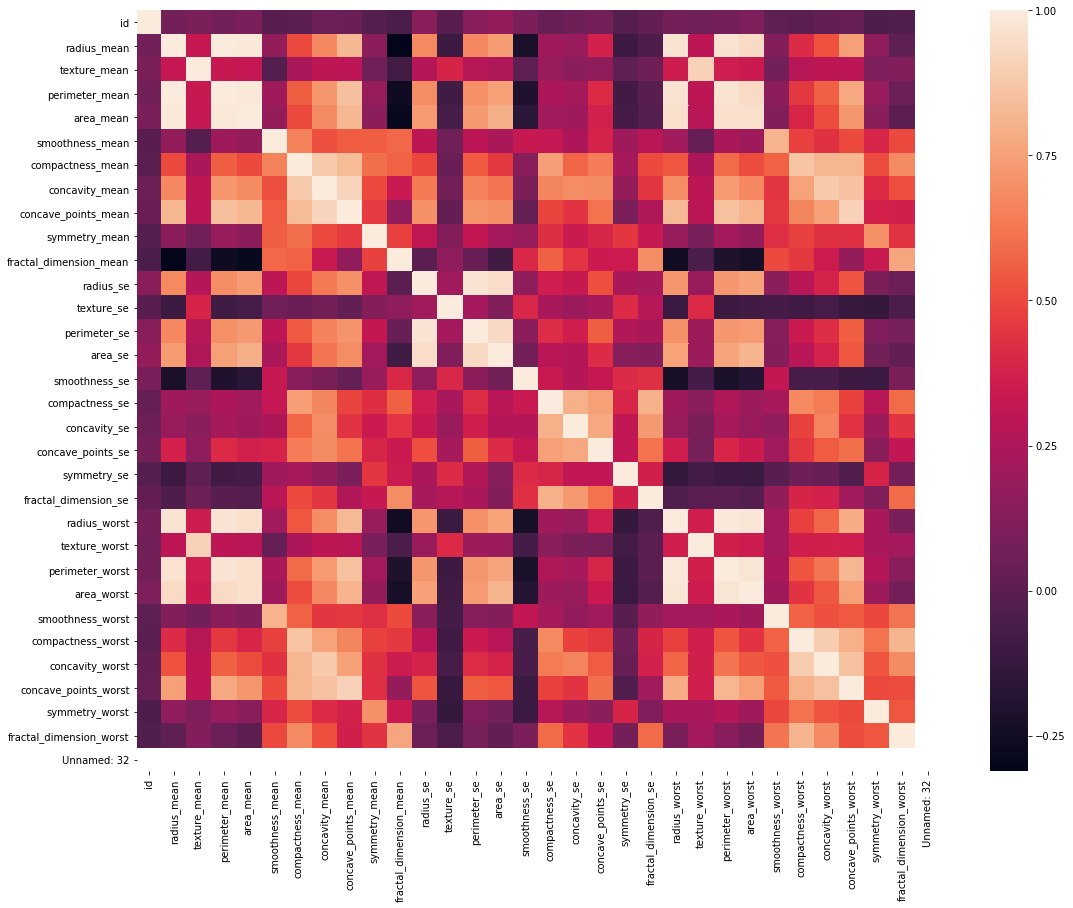

In [75]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(corr)

In [76]:
# 5. Визуализировать взаимосвязи между переменными.

In [77]:
# Построим зависимости между переменными

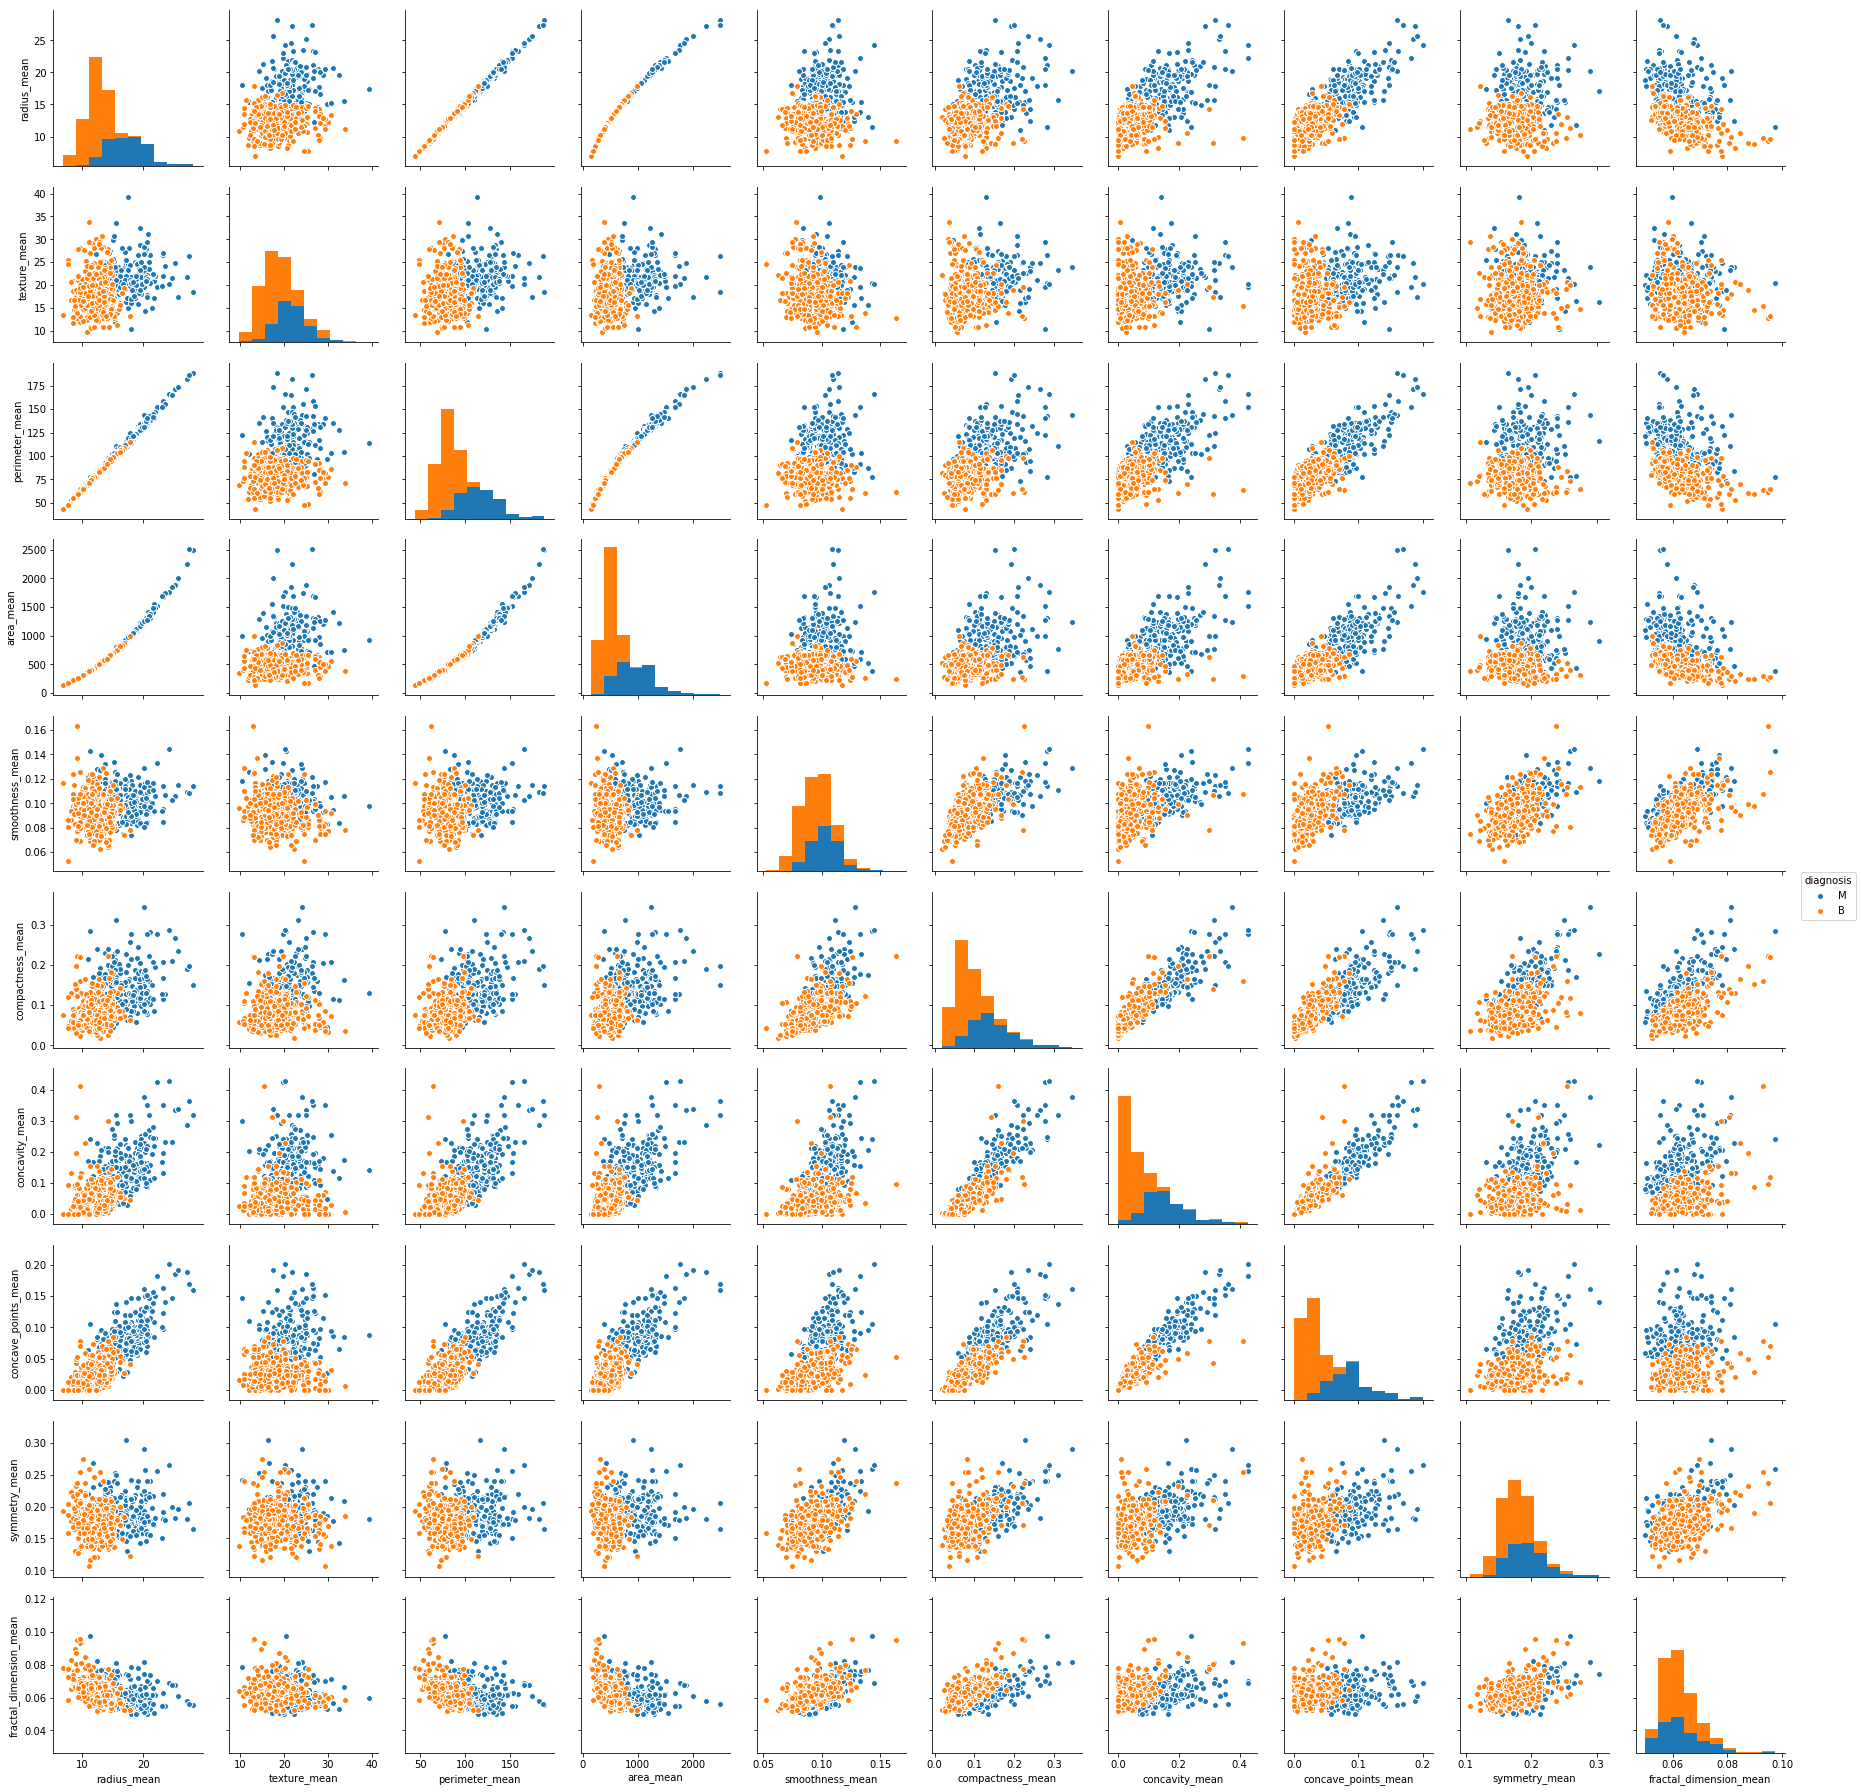

In [78]:
sns.pairplot(data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', \
                   'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']], \
            hue='diagnosis')

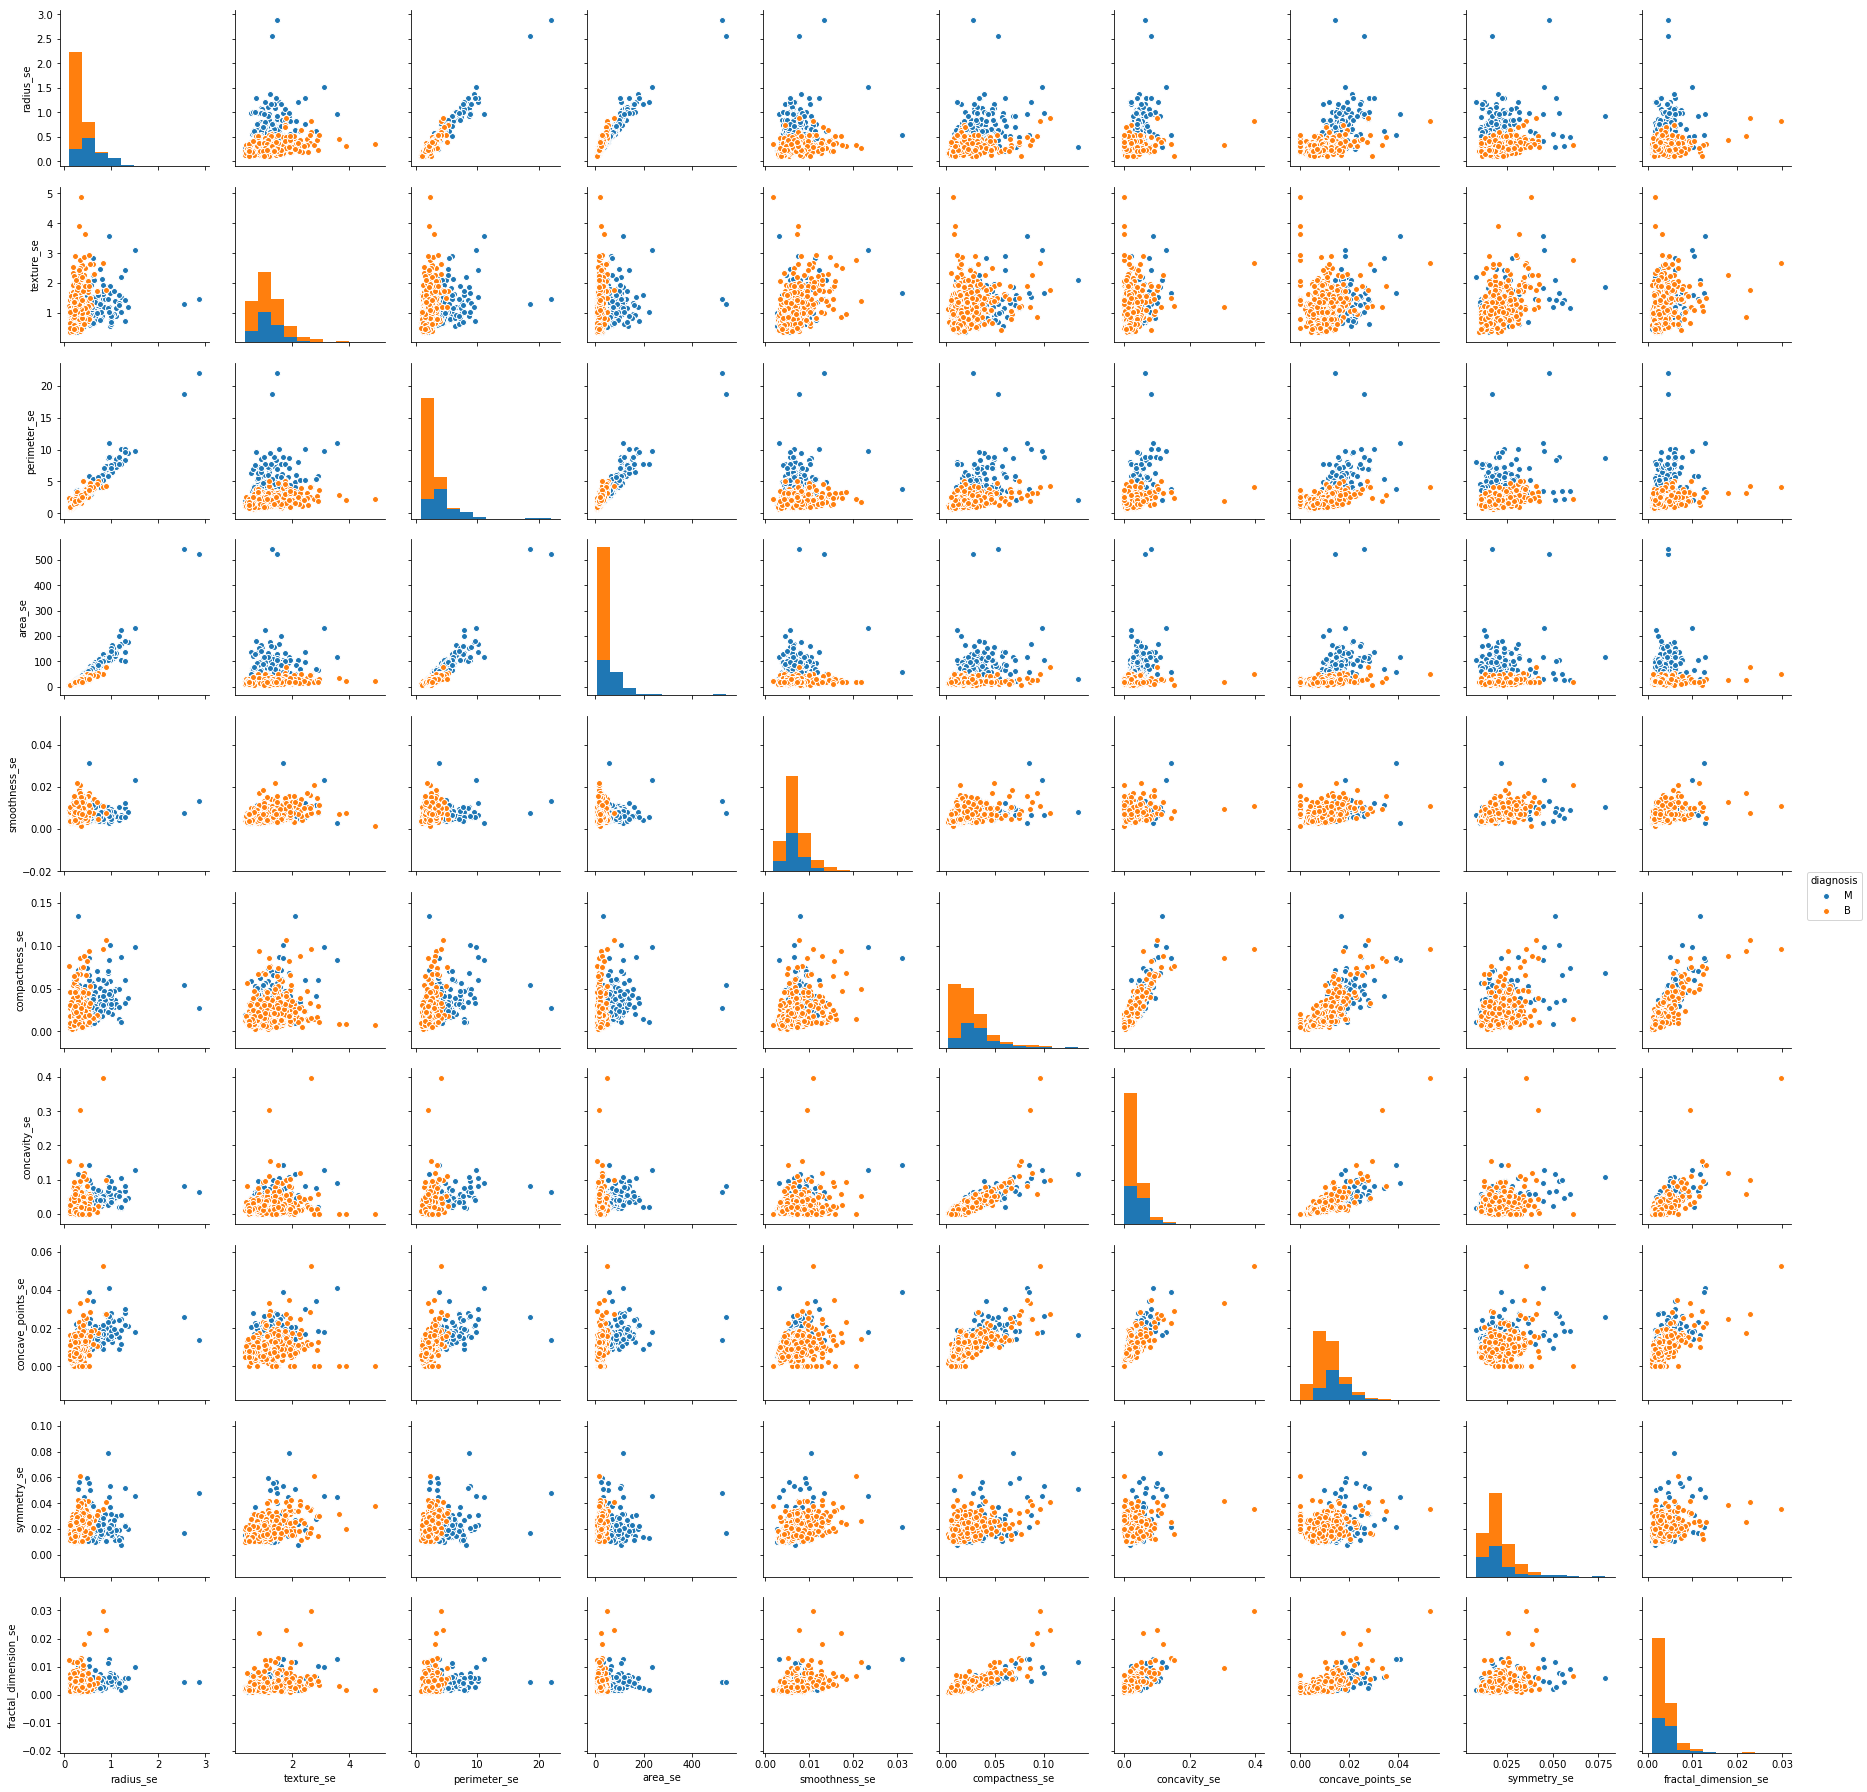

In [79]:
sns.pairplot(data[['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', \
                   'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se']], \
            hue='diagnosis')

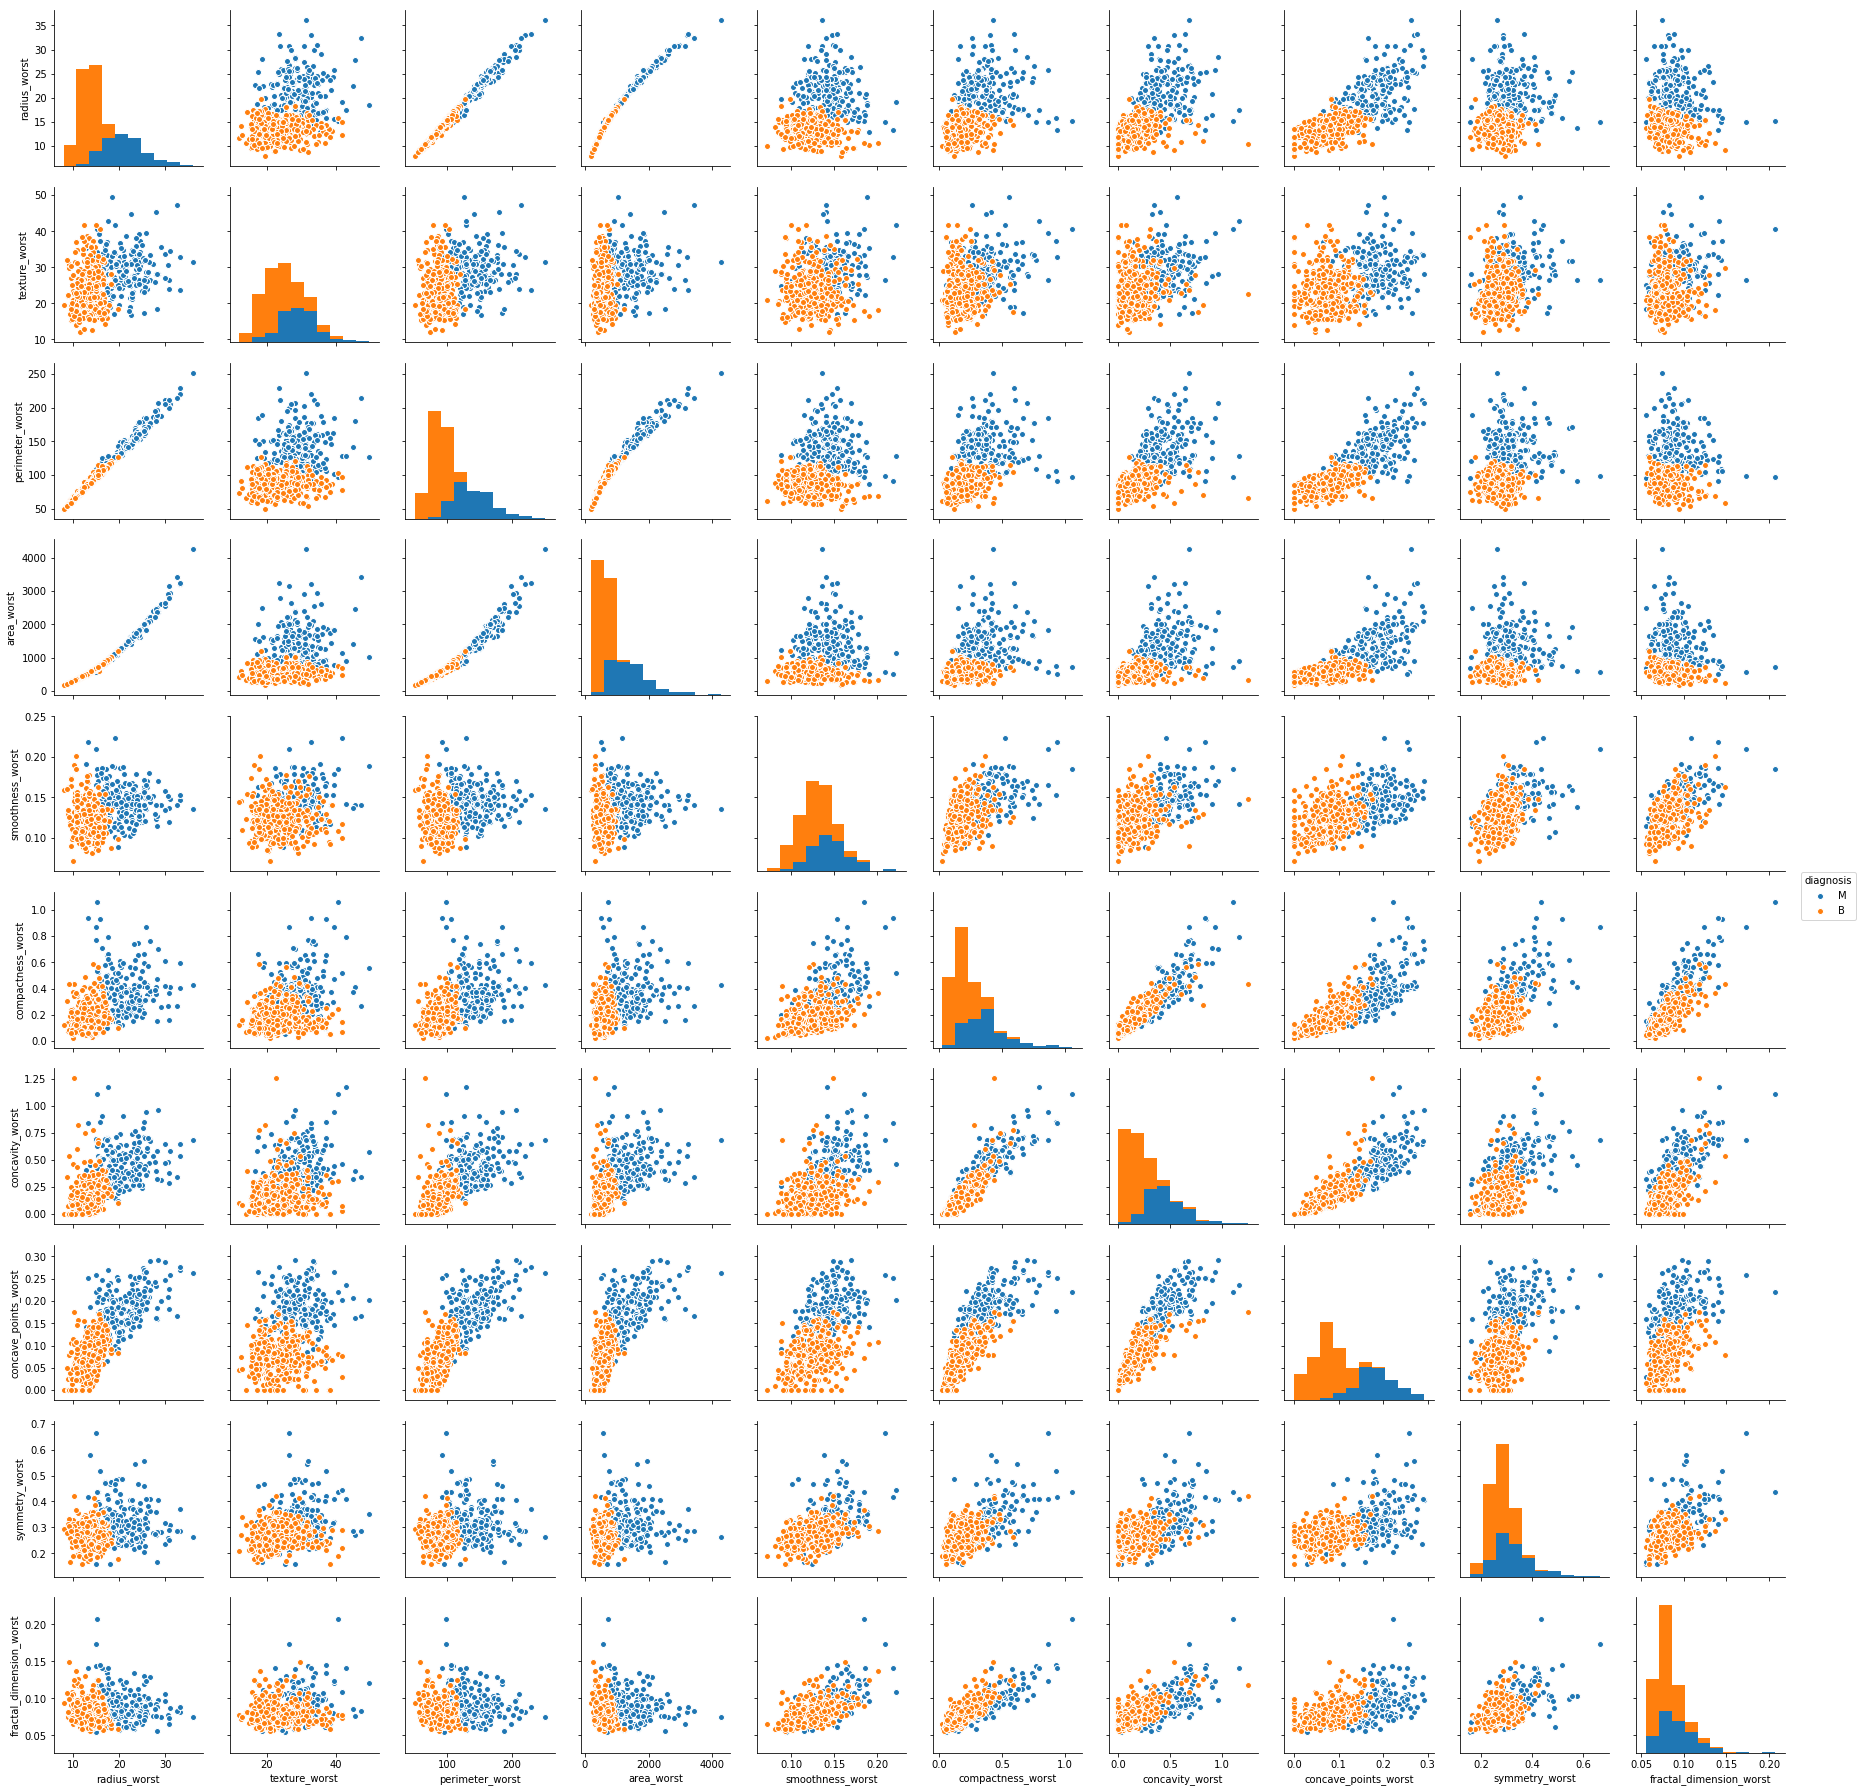

In [80]:
sns.pairplot(data[['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', \
                   'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']], \
            hue='diagnosis')

In [81]:
# 6. С помощью статистических методов проверить взаимосвязи между переменными.

In [82]:
#  проверим 

keys = set(data.keys()) - set(['Unnamed: 32','diagnosis', 'id'])
#print(keys)
for key in list(keys):
    print('Param: ', key)
    print(stats.ttest_ind(data[data['diagnosis'] == 'M'][key],data[data['diagnosis'] == 'B'][key]))

Param:  area_se
Ttest_indResult(statistic=15.609342900255001, pvalue=5.8955213926058635e-46)
Param:  symmetry_se
Ttest_indResult(statistic=-0.1552978000059369, pvalue=0.8766418183858812)
Param:  fractal_dimension_worst
Ttest_indResult(statistic=8.151316497940705, pvalue=2.316432449982829e-15)
Param:  perimeter_mean
Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)
Param:  radius_worst
Ttest_indResult(statistic=29.33908156342075, pvalue=8.482291921684414e-116)
Param:  area_mean
Ttest_indResult(statistic=23.938687235690992, pvalue=4.734564310307344e-88)
Param:  compactness_mean
Ttest_indResult(statistic=17.69839197688993, pvalue=3.9382631058873895e-56)
Param:  area_worst
Ttest_indResult(statistic=25.721590260589004, pvalue=2.828847704286693e-97)
Param:  fractal_dimension_se
Ttest_indResult(statistic=1.862330463973157, pvalue=0.06307355082239346)
Param:  symmetry_worst
Ttest_indResult(statistic=10.902303982929364, pvalue=2.951120577154039e-25)
Param:  texture_mea

In [83]:
# для параметров fractal_dimension_mean, smoothness_se,  
# texture_se, symmetry_se и fractal_dimension_se мы не можем отклонить нулевую гипотезу

In [84]:
# 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. 
#    Какой из этих двух подходов даст лучший результат при классификации?

In [85]:
# Используем различные варианты изменения размерности

In [86]:
data1 = data.copy()

In [87]:
data1['diagnosis'] = data1['diagnosis'].map({'M':1,'B':0})
data1 = data1.drop(columns=['Unnamed: 32','diagnosis'])

In [88]:
# 7.1 PCA

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_sc = sc.fit_transform(data1)

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99).fit(train_sc)
train_pca = pca.transform(train_sc)


In [91]:
train_pca.shape

(569, 18)

Text(0,0.5,'explained_variance_ratio_')

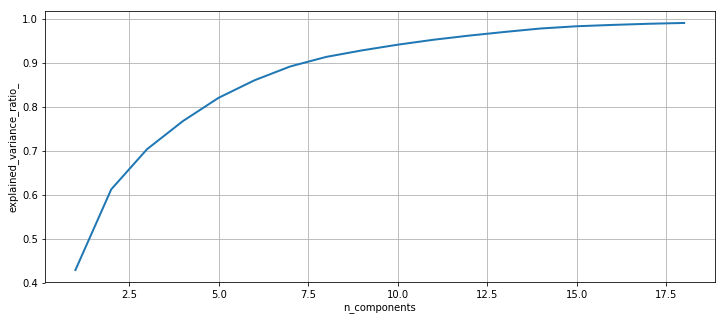

In [92]:
import matplotlib.pyplot as plt
matplotlib.pyplot.figure(figsize=(12, 5))
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [93]:
# 7.2 Cнизим размерность отобрав признаки по критерию  
# 

In [94]:
data2 = data.copy()
data2['diagnosis'] = data2['diagnosis'].map({'M':1,'B':0})

In [95]:
data2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [114]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [98]:
keys = data2.keys()
sc2 = StandardScaler()
keys_2 = list(set(keys)-set(['Unnamed: 32','id']))
data2_s = data2[keys_2]
data2_sc_arr = sc2.fit_transform(data2_s)
data2_sc  = pd.DataFrame(data=data2_sc_arr, columns=keys_2)  
data2_sc.head()

,area_se,symmetry_se,fractal_dimension_worst,perimeter_mean,radius_worst,area_mean,compactness_mean,area_worst,fractal_dimension_se,symmetry_worst,...,concavity_mean,symmetry_mean,compactness_worst,texture_se,smoothness_worst,perimeter_se,fractal_dimension_mean,concave_points_worst,concavity_se,radius_mean
0,2.487578,1.148757,1.937015,1.269934,1.886690,0.984375,3.283515,2.001237,0.907083,2.750622,...,2.652874,2.217515,2.616665,-0.565265,1.307686,2.833031,2.255747,2.296076,0.724026,1.097064
1,0.742402,-0.805450,0.281190,1.685955,1.805927,1.908708,-0.487072,1.890489,-0.099444,-0.243890,...,-0.023846,0.001392,-0.430444,-0.876244,-0.375612,0.263327,-0.868652,1.087084,-0.440780,1.829821
2,1.181336,0.237036,0.201391,1.566503,1.511870,1.558884,1.052926,1.456285,0.293559,1.152255,...,1.363478,0.939685,1.082932,-0.780083,0.527407,0.850928,-0.398008,1.955000,0.213076,1.579888
3,-0.288378,4.732680,4.935010,-0.592687,-0.281464,-0.764464,3.402909,-0.550021,2.047511,6.046041,...,1.915897,2.867383,3.893397,-0.110409,3.394275,0.286593,4.910919,2.175786,0.819518,-0.768909
4,1.190357,-0.361092,-0.397100,1.776573,1.298575,1.826229,0.539340,1.220724,0.499328,-0.868353,...,1.371011,-0.009560,-0.313395,-0.790244,0.220556,1.273189,-0.562450,0.729259,0.828471,1.750297


In [99]:
keys = data2.keys()


result = pd.DataFrame([])
for key in list(set(keys)-set(['diagnosis','Unnamed: 32','id'])):
    print('diagnosis ~ '+ key)
    res = smf.ols('diagnosis ~ '+ key, data=data2_sc).fit()
    result[key] = pd.Series(res.params[key])
#res.append({'lm_inter':est.params['Intercept'],
#            'lm_x':est.params['index']}, ignore_index=True)
    x = res.summary()
    print(res.params)


diagnosis ~ area_se
Intercept    5.325601e-16
area_se      5.482359e-01
dtype: float64
diagnosis ~ symmetry_se
Intercept      5.325601e-16
symmetry_se   -6.521756e-03
dtype: float64
diagnosis ~ fractal_dimension_worst
Intercept                  5.325601e-16
fractal_dimension_worst    3.238722e-01
dtype: float64
diagnosis ~ perimeter_mean
Intercept         5.325601e-16
perimeter_mean    7.426355e-01
dtype: float64
diagnosis ~ radius_worst
Intercept       5.325601e-16
radius_worst    7.764538e-01
dtype: float64
diagnosis ~ area_mean
Intercept    5.325601e-16
area_mean    7.089838e-01
dtype: float64
diagnosis ~ compactness_mean
Intercept           5.325601e-16
compactness_mean    5.965337e-01
dtype: float64
diagnosis ~ area_worst
Intercept     5.325601e-16
area_worst    7.338250e-01
dtype: float64
diagnosis ~ fractal_dimension_se
Intercept               5.325601e-16
fractal_dimension_se    7.797242e-02
dtype: float64
diagnosis ~ symmetry_worst
Intercept         5.325601e-16
symmetry_worst

In [100]:
result.T.sort_values(0, ascending=False)

,0
concave_points_worst,0.793566
perimeter_worst,0.782914
concave_points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


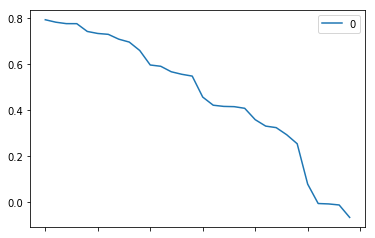

In [101]:
result.T.sort_values(0, ascending=False).plot()

In [102]:
# Из полученного видно, что коэфициенты резко падают после 0.25 однако всего 5 параметров ниже этого уровня
# для дальнейшей работы используем 2 вариант: 
# первый - отсечем параметры по уровню 0.25, 
# второй - по уровню 0.5 

In [111]:
train_min_1 = data2_sc[list(result.T[result.T[0] > 0.25].index)]
train_min_1.head()

,area_se,fractal_dimension_worst,perimeter_mean,radius_worst,area_mean,compactness_mean,area_worst,symmetry_worst,texture_mean,radius_se,...,concave_points_mean,concavity_mean,symmetry_mean,compactness_worst,smoothness_worst,perimeter_se,concave_points_worst,concavity_se,radius_mean,diagnosis
0,2.487578,1.937015,1.269934,1.886690,0.984375,3.283515,2.001237,2.750622,-2.073335,2.489734,...,2.532475,2.652874,2.217515,2.616665,1.307686,2.833031,2.296076,0.724026,1.097064,1.297676
1,0.742402,0.281190,1.685955,1.805927,1.908708,-0.487072,1.890489,-0.243890,-0.353632,0.499255,...,0.548144,-0.023846,0.001392,-0.430444,-0.375612,0.263327,1.087084,-0.440780,1.829821,1.297676
2,1.181336,0.201391,1.566503,1.511870,1.558884,1.052926,1.456285,1.152255,0.456187,1.228676,...,2.037231,1.363478,0.939685,1.082932,0.527407,0.850928,1.955000,0.213076,1.579888,1.297676
3,-0.288378,4.935010,-0.592687,-0.281464,-0.764464,3.402909,-0.550021,6.046041,0.253732,0.326373,...,1.451707,1.915897,2.867383,3.893397,3.394275,0.286593,2.175786,0.819518,-0.768909,1.297676
4,1.190357,-0.397100,1.776573,1.298575,1.826229,0.539340,1.220724,-0.868353,-1.151816,1.270543,...,1.428493,1.371011,-0.009560,-0.313395,0.220556,1.273189,0.729259,0.828471,1.750297,1.297676


In [112]:
train_min_2 = data2_sc[list(result.T[result.T[0] > 0.5].index)]
train_min_2.head()

,area_se,perimeter_mean,radius_worst,area_mean,compactness_mean,area_worst,radius_se,concavity_worst,perimeter_worst,concave_points_mean,concavity_mean,compactness_worst,perimeter_se,concave_points_worst,radius_mean,diagnosis
0,2.487578,1.269934,1.886690,0.984375,3.283515,2.001237,2.489734,2.109526,2.303601,2.532475,2.652874,2.616665,2.833031,2.296076,1.097064,1.297676
1,0.742402,1.685955,1.805927,1.908708,-0.487072,1.890489,0.499255,-0.146749,1.535126,0.548144,-0.023846,-0.430444,0.263327,1.087084,1.829821,1.297676
2,1.181336,1.566503,1.511870,1.558884,1.052926,1.456285,1.228676,0.854974,1.347475,2.037231,1.363478,1.082932,0.850928,1.955000,1.579888,1.297676
3,-0.288378,-0.592687,-0.281464,-0.764464,3.402909,-0.550021,0.326373,1.989588,-0.249939,1.451707,1.915897,3.893397,0.286593,2.175786,-0.768909,1.297676
4,1.190357,1.776573,1.298575,1.826229,0.539340,1.220724,1.270543,0.613179,1.338539,1.428493,1.371011,-0.313395,1.273189,0.729259,1.750297,1.297676


In [113]:
# 7.3 Повысим размерность сгенерировав дополнительные признаки: 
#     1) добавим декартово произведение признаков
#     2) добавим квадратный корень из признака
#     3) добавим экспоненту и логарифм значения признака

In [123]:
data3 = data.copy()
data3['diagnosis'] = data3['diagnosis'].map({'M':1,'B':0})

In [124]:
data3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [125]:
keys3_all = data3.keys()
keys3 = list(set(keys3_all)-set(['diagnosis','Unnamed: 32','id']))
    
for key1 in keys3:
    data3[key1+'_sqrt'] = np.sqrt(data3[key1])
    for key2 in keys3:
        data3[key1+'_x_'+key2] = data3[key1]*data3[key2]


data3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_mean_x_concavity_mean,radius_mean_x_symmetry_mean,radius_mean_x_compactness_worst,radius_mean_x_texture_se,radius_mean_x_smoothness_worst,radius_mean_x_perimeter_se,radius_mean_x_fractal_dimension_mean,radius_mean_x_concave_points_worst,radius_mean_x_concavity_se,radius_mean_x_radius_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,5.398799,4.351781,11.974144,16.286347,2.917978,154.51611,1.415993,4.774546,0.966603,323.6401
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,1.787533,3.727284,3.838362,15.096323,2.546566,69.89686,1.165702,3.826020,0.382602,423.1249
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,3.886806,4.073861,8.358405,15.494061,2.843236,90.27865,1.181203,4.784670,0.754521,387.6961
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,2.756788,2.965774,9.893146,13.201520,2.395916,39.34190,1.112765,2.940650,0.646486,130.4164
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,4.017420,3.670461,4.159450,15.852577,2.787846,110.33702,1.193661,3.297125,1.154095,411.6841


In [ ]:
# Сформируцем 2 набора данных:
# 1. Со всеми полученными признаками
# 2. Отберем признаки аналогично пункту 7.2 
#

In [128]:
keys3_all = data3.keys()
sc3 = StandardScaler()
keys_3 = list(set(keys3_all)-set(['Unnamed: 32','id']))
data3_s = data3[keys_3]
data3_sc_arr = sc3.fit_transform(data3_s)
data3_sc  = pd.DataFrame(data=data3_sc_arr, columns=keys_3)  
data3_sc.head()

,concavity_worst_x_symmetry_worst,symmetry_mean_x_perimeter_mean,symmetry_mean_x_fractal_dimension_mean,radius_worst_x_smoothness_se,compactness_mean_x_symmetry_se,fractal_dimension_mean_x_symmetry_mean,area_worst_x_concavity_mean,compactness_worst_x_symmetry_mean,radius_se_x_fractal_dimension_worst,compactness_mean_x_radius_se,...,symmetry_se_x_symmetry_se,concavity_mean_x_radius_worst,texture_mean_x_area_worst,smoothness_se_x_concave_points_worst,radius_mean,smoothness_worst_x_concave_points_mean,smoothness_worst_x_concave_points_se,symmetry_mean_x_smoothness_mean,texture_mean_x_area_mean,symmetry_se_x_concave_points_se
0,2.963757,2.271041,2.773794,0.980424,2.954242,2.773794,2.998896,3.179597,3.949227,4.310952,...,0.803879,2.978832,0.221662,1.633003,1.097064,2.819068,1.101035,2.304500,-0.311286,0.925169
1,-0.237568,1.282677,-0.439903,0.370810,-0.558254,-0.439903,0.368937,-0.402382,0.581343,-0.115359,...,-0.580577,0.233089,1.198622,0.331468,1.829821,0.300644,0.075311,-0.486677,1.192176,-0.305603
2,0.943006,1.777491,0.345381,0.646238,0.656590,0.345381,1.378750,1.118791,1.277753,1.180531,...,0.031349,1.484245,1.308922,1.267785,1.579888,1.924264,1.546696,1.051414,1.420530,0.867853
3,4.538261,0.591302,5.069282,0.471488,7.120654,5.069282,0.170247,4.981037,2.119142,1.544479,...,5.987146,0.953017,-0.442875,2.793152,-0.768909,2.522177,2.606065,4.062115,-0.599096,3.623233
4,0.107202,1.345613,-0.302969,2.829877,0.042834,-0.302969,1.224867,-0.310223,0.982932,0.864266,...,-0.355153,1.388534,0.336927,1.935489,1.750297,1.237427,1.118828,0.099324,0.625605,0.308321


In [130]:

result3 = pd.DataFrame([])
for key in list(set(keys3_all)-set(['diagnosis','Unnamed: 32','id'])):
    res = smf.ols('diagnosis ~ '+ key, data=data3_sc).fit()
    result3[key] = pd.Series(res.params[key])

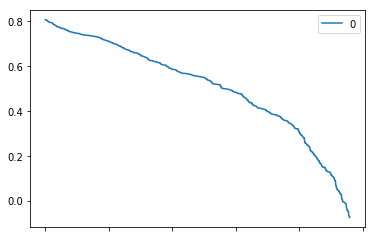

In [131]:
result3.T.sort_values(0, ascending=False).plot()

In [134]:
train_max_1 = data3_sc[list(result3.T.index)]
train_max_1.head()

,concavity_worst_x_symmetry_worst,symmetry_mean_x_perimeter_mean,symmetry_mean_x_fractal_dimension_mean,radius_worst_x_smoothness_se,compactness_mean_x_symmetry_se,fractal_dimension_mean_x_symmetry_mean,area_worst_x_concavity_mean,compactness_worst_x_symmetry_mean,radius_se_x_fractal_dimension_worst,compactness_mean_x_radius_se,...,symmetry_se_x_symmetry_se,concavity_mean_x_radius_worst,texture_mean_x_area_worst,smoothness_se_x_concave_points_worst,radius_mean,smoothness_worst_x_concave_points_mean,smoothness_worst_x_concave_points_se,symmetry_mean_x_smoothness_mean,texture_mean_x_area_mean,symmetry_se_x_concave_points_se
0,2.963757,2.271041,2.773794,0.980424,2.954242,2.773794,2.998896,3.179597,3.949227,4.310952,...,0.803879,2.978832,0.221662,1.633003,1.097064,2.819068,1.101035,2.304500,-0.311286,0.925169
1,-0.237568,1.282677,-0.439903,0.370810,-0.558254,-0.439903,0.368937,-0.402382,0.581343,-0.115359,...,-0.580577,0.233089,1.198622,0.331468,1.829821,0.300644,0.075311,-0.486677,1.192176,-0.305603
2,0.943006,1.777491,0.345381,0.646238,0.656590,0.345381,1.378750,1.118791,1.277753,1.180531,...,0.031349,1.484245,1.308922,1.267785,1.579888,1.924264,1.546696,1.051414,1.420530,0.867853
3,4.538261,0.591302,5.069282,0.471488,7.120654,5.069282,0.170247,4.981037,2.119142,1.544479,...,5.987146,0.953017,-0.442875,2.793152,-0.768909,2.522177,2.606065,4.062115,-0.599096,3.623233
4,0.107202,1.345613,-0.302969,2.829877,0.042834,-0.302969,1.224867,-0.310223,0.982932,0.864266,...,-0.355153,1.388534,0.336927,1.935489,1.750297,1.237427,1.118828,0.099324,0.625605,0.308321


In [135]:
train_max_2 = data3_sc[list(result3.T[result3.T[0] > 0.5].index)]
train_max_2.head()

,concavity_worst_x_symmetry_worst,symmetry_mean_x_perimeter_mean,area_worst_x_concavity_mean,compactness_worst_x_symmetry_mean,radius_se_x_fractal_dimension_worst,compactness_mean_x_radius_se,symmetry_mean_x_radius_worst,compactness_worst_sqrt,perimeter_worst_x_perimeter_mean,radius_worst_x_texture_worst,...,concavity_worst_x_compactness_mean,concave_points_worst_x_area_worst,radius_mean_x_perimeter_mean,concavity_mean_x_radius_worst,texture_mean_x_area_worst,smoothness_se_x_concave_points_worst,radius_mean,smoothness_worst_x_concave_points_mean,smoothness_worst_x_concave_points_se,texture_mean_x_area_mean
0,2.963757,2.271041,2.998896,3.179597,3.949227,4.310952,2.904565,2.275760,1.833452,0.058359,...,3.512961,2.705028,1.087674,2.978832,0.221662,1.633003,1.097064,2.819068,1.101035,-0.311286
1,-0.237568,1.282677,0.368937,-0.402382,0.581343,-0.115359,1.427080,-0.344992,1.594700,0.800614,...,-0.402911,1.561692,1.779612,0.233089,1.198622,0.331468,1.829821,0.300644,0.075311,1.192176
2,0.943006,1.777491,1.378750,1.118791,1.277753,1.180531,1.746600,1.154011,1.399421,0.886129,...,0.759406,1.903782,1.550031,1.484245,1.308922,1.267785,1.579888,1.924264,1.546696,1.420530
3,4.538261,0.591302,0.170247,4.981037,2.119142,1.544479,0.825478,3.060264,-0.455616,-0.170280,...,3.455688,0.115242,-0.657677,0.953017,-0.442875,2.793152,-0.768909,2.522177,2.606065,-0.599096
4,0.107202,1.345613,1.224867,-0.310223,0.982932,0.864266,1.013791,-0.203007,1.511935,-0.269328,...,0.345095,0.844702,1.789407,1.388534,0.336927,1.935489,1.750297,1.237427,1.118828,0.625605


In [ ]:
# 8. Провести стратегию Oversampling/Undersampling, проверить дает ли она улучшение результатов.

# Для проверки действенности стратегий создадим еще наборы данных 
# Для балансировки классов будем использовать простейшую стратегию
# 

In [140]:
B = data.diagnosis.value_counts()['B'] 
M = data.diagnosis.value_counts()['M'] 
print(B)
print(M)

357
212


In [ ]:
train_pca_over =  train_pca.copy()
train_pca_over['diagnosis'] = data['diagnosis']
train_pca_under = train_pca_over.copy()

In [ ]:
train_min_1_over =  train_min_1.copy()
train_min_1_over['diagnosis'] = data['diagnosis']
train_min_1_under = train_min_1_over.copy()

In [ ]:
train_min_2_over =  train_min_2.copy()
train_min_2_over['diagnosis'] = data['diagnosis']
train_min_2_under = train_min_2_over.copy()

In [ ]:
train_max_1_over =  train_max_1.copy()
train_max_1_over['diagnosis'] = data['diagnosis']
train_max_1_under = train_max_1_over.copy()

In [ ]:
train_max_2_over =  train_max_2.copy()
train_max_2_over['diagnosis'] = data['diagnosis']
train_max_2_under = train_max_2_over.copy()